In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


In [3]:
with open('past_wordle_answers.txt', 'r') as file:
    past_wordle_answers = file.read().splitlines()

with open('common_words.txt', 'r') as file:
    common_words = file.read().splitlines()

past_wordle_set = set(past_wordle_answers)
common_words_set = set(common_words)

In [13]:
common_in_both = past_wordle_set & common_words_set
only_in_past_wordle = past_wordle_set - common_words_set

df_common_in_both = pd.DataFrame(list(common_in_both), columns=['word'])
df_only_in_past_wordle = pd.DataFrame(list(only_in_past_wordle), columns=['word'])

In [14]:
print(only_in_past_wordle)

{'pleat', 'trove', 'picky', 'donut', 'ninth', 'sassy', 'phony', 'zesty', 'biome', 'erode', 'chard', 'pasta', 'belch', 'unlit', 'unify', 'laser', 'skier', 'saute', 'blimp', 'perky', 'piney', 'boozy', 'nanny', 'whiny', 'masse', 'golem', 'recap', 'metro', 'itchy', 'ardor', 'howdy', 'enema', 'word.', 'condo', 'ruddy', 'ember', 'grout', 'aorta', 'magma', 'woven', 'splat', 'rhino', 'binge', 'micro', 'batty', 'ramen', 'ionic', 'midge', 'retry', 'patty', 'anode', 'koala', 'snafu', 'gecko', 'homer', 'matey', 'corny', 'favor', 'retch', 'ethos', 'brash', 'sushi', 'robot', 'viral', 'unfed', 'duvet', 'position.', 'carat', 'sonic', 'polyp', 'kebab', 'ghoul', 'hutch', 'guppy', 'retro', 'stomp', 'tangy', 'hunky', 'decal', 'titan', 'disco', 'woken', 'unzip', 'intro', 'bloke', 'trope', 'labor', 'beret', 'dingo', 'stein', 'rodeo', 'pixel', 'plunk', 'wacky', 'moult', 'blurb', 'pixie', 'stash', 'vigor', 'tapir', 'egret', 'teary', 'mucky', 'humph', 'gamer', 'balsa', 'parer', 'arbor', 'latte', 'spiel', 'face

In [16]:
print(f"Total past Wordle answers: {len(past_wordle_answers)}")
print(f"Total common words: {len(common_words)}")
print(f"Words in both lists: {len(common_in_both)}")
print(f"Words only in past Wordle answers: {len(only_in_past_wordle)}")
print(f"Percentage of Wordle words in the Common 3k: {float(len(common_in_both)) / len(past_wordle_answers)}")

Total past Wordle answers: 1107
Total common words: 3103
Words in both lists: 945
Words only in past Wordle answers: 154
Percentage of Wordle words in the Common 3k: 0.8536585365853658


In [17]:
def calculate_letter_frequencies(words):
    letter_counter = Counter()
    positional_counter = [Counter() for _ in range(5)]
    
    for word in words:
        for position, letter in enumerate(word):
            letter_counter[letter] += 1
            positional_counter[position][letter] += 1
            
    return letter_counter, positional_counter

In [20]:
letter_counter, positional_counter = calculate_letter_frequencies(common_in_both)
df_letter_freq = pd.DataFrame.from_dict(letter_counter, orient='index', columns=['frequency']).sort_index()
df_positional_freq = pd.DataFrame(positional_counter).T
df_positional_freq.columns = [f'Position {i+1}' for i in range(5)]

/var/folders/np/sw1hsvrj14x94rqhvr0cg5280000gn/T/ipykernel_29840/1487456405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_letter_freq.index, y='frequency', data=df_letter_freq, palette='viridis')


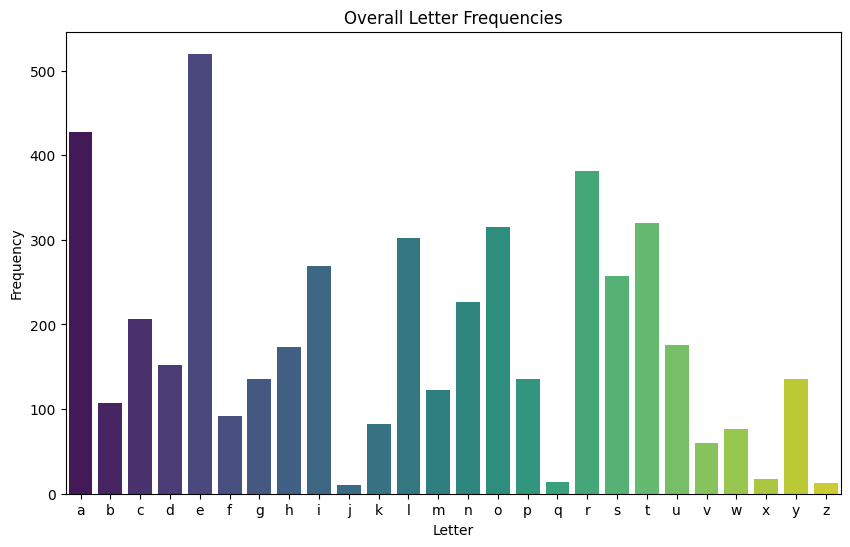

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_letter_freq.index, y='frequency', data=df_letter_freq, palette='viridis')
plt.title('Overall Letter Frequencies')
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.show()

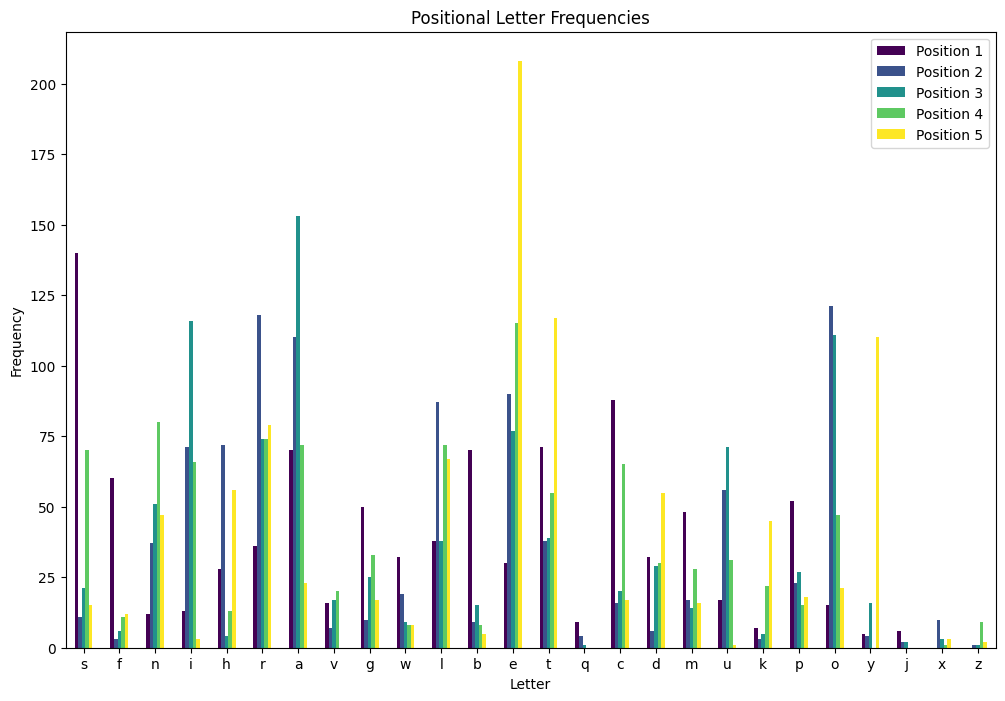

In [24]:
df_positional_freq.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Positional Letter Frequencies')
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()